In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<div class="alert alert-warning">

# PS 2 - Signal Detection Theory

In this problem set, we will explore Signal Detection Theory (SDT), a model for how we make binary decisions under uncertainty. We'll use a memory recognition task as our example: deciding whether an item (e.g. a letter or an image) is "old" (seen before in a study list) or "new" (not seen before).

## The Problem

Imagine you're doing a memory experiment. You study a list of words, then later see a mix of old words (from the list) and new words (not from the list). For each word, you must decide: **"Have I seen this before?"**

This seems simple, but your memory isn't perfect. Sometimes an old word doesn't feel very familiar, and sometimes a new word feels strangely familiar. How do you decide?

## The SDT Model

SDT proposes that:
1. Each item produces an internal "familiarity" signal
2. This signal is **noisy** - the same item might feel more or less familiar on different occasions
3. Old items tend to produce higher familiarity than new items, but the distributions **overlap**
4. You set a **criterion** (threshold): if familiarity > criterion, say "old"; otherwise say "new"

## Key Parameters
- **d' (d-prime)**: Sensitivity - how well you can discriminate old from new (distance between distribution means)
- **criterion (c)**: Response bias - your threshold for saying "old" (lenient vs. strict)

## This Problem Set

We'll visualize how SDT works, simulate decisions, and compute d' and criterion from data. Your goal is to build intuition for how sensitivity and bias separately contribute to decision-making.

# 1. Visualizing the SDT Model

In SDT, we assume that the internal familiarity signal follows a normal (Gaussian) distribution:
- **New items**: familiarity ~ N(0, 1) — centered at 0
- **Old items**: familiarity ~ N(d', 1) — centered at d' (shifted to the right)

The parameter **d'** controls how separated these distributions are:
- d' = 0: No sensitivity (distributions completely overlap — you're guessing)
- d' = 1: Moderate sensitivity  
- d' = 3: High sensitivity (distributions barely overlap — easy to discriminate)

The **criterion** is a vertical line: everything to the right is called "old", everything to the left is called "new".

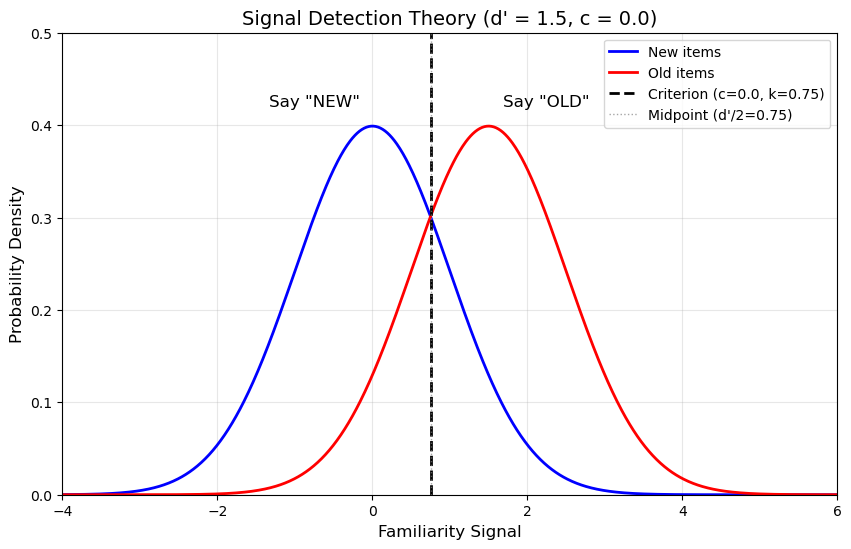

In [2]:
# --- Parameters ---
d_prime = 1.5  # Sensitivity: distance between distribution means
criterion_c = 0.0  # Decision criterion c (0 = unbiased, at midpoint)

# Convert c to threshold location k on x-axis: k = c + d'/2
threshold_k = criterion_c + d_prime / 2

# --- Create the distributions ---
x = np.linspace(-4, 6, 1000)

# New items: N(0, 1)
new_dist = stats.norm(loc=0, scale=1)
new_pdf = new_dist.pdf(x)

# Old items: N(d', 1)  
old_dist = stats.norm(loc=d_prime, scale=1)
old_pdf = old_dist.pdf(x)

# --- Plot ---
plt.figure(figsize=(10, 6))

# Plot distributions
plt.plot(x, new_pdf, 'b-', linewidth=2, label='New items')
plt.plot(x, old_pdf, 'r-', linewidth=2, label='Old items')

# Plot criterion (at threshold location k)
plt.axvline(x=threshold_k, color='black', linestyle='--', linewidth=2, 
            label=f'Criterion (c={criterion_c}, k={threshold_k:.2f})')

# Mark the midpoint between distributions
midpoint = d_prime / 2
plt.axvline(x=midpoint, color='gray', linestyle=':', linewidth=1, alpha=0.7, label=f'Midpoint (d\'/2={midpoint:.2f})')

# Add labels for decision regions
plt.text(threshold_k - 1.5, 0.42, 'Say "NEW"', fontsize=12, ha='center')
plt.text(threshold_k + 1.5, 0.42, 'Say "OLD"', fontsize=12, ha='center')

# Formatting
plt.xlabel('Familiarity Signal', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title(f'Signal Detection Theory (d\' = {d_prime}, c = {criterion_c})', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(-4, 6)
plt.ylim(0, 0.5)

plt.show()

# 2. The Four Outcomes

Depending on the true item type and your response, there are four possible outcomes:

| | Respond "OLD" | Respond "NEW" |
|---|---|---|
| **Item is OLD** | **Hit** (correct) | **Miss** (error) |
| **Item is NEW** | **False Alarm** (error) | **Correct Rejection** (correct) |

These correspond to areas under the curves:
- **Hit Rate (H)**: Area under OLD distribution to the right of criterion
- **False Alarm Rate (F)**: Area under NEW distribution to the right of criterion
- **Miss Rate**: Area under OLD distribution to the left of criterion (= 1 - H)
- **Correct Rejection Rate**: Area under NEW distribution to the left of criterion (= 1 - F)

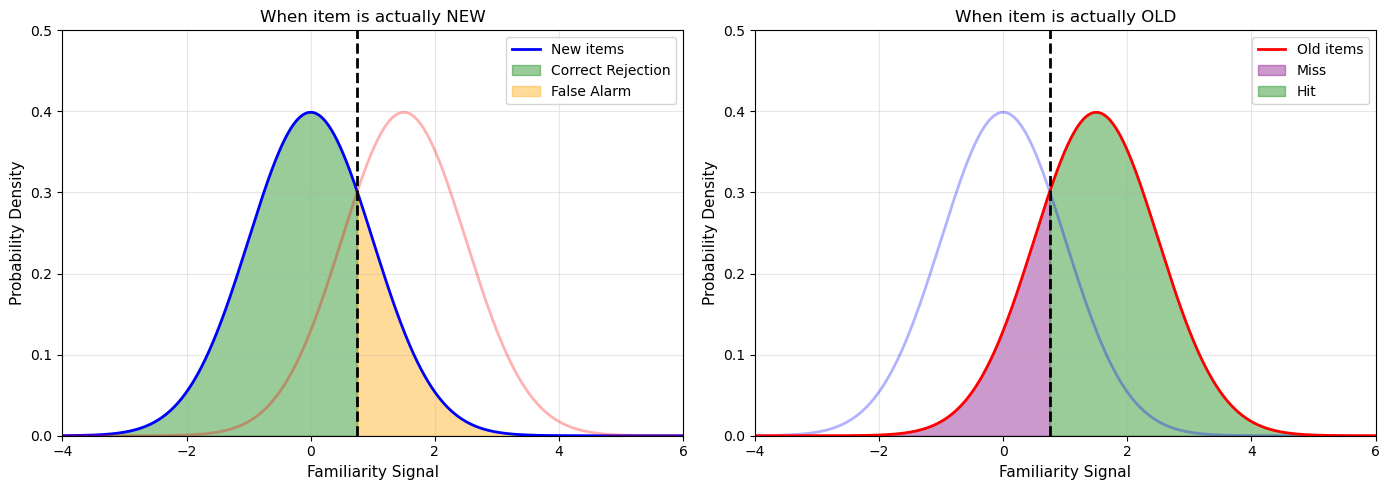

With d' = 1.5 and c = 0.0 (threshold k = 0.75):
  Hit Rate (H):          0.773
  False Alarm Rate (F):  0.227
  Miss Rate:             0.227
  Correct Rejection:     0.773


In [3]:
# Visualize the four outcomes with shading
# (Uses d_prime, criterion_c, and threshold_k from previous cell)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: What happens when the item is NEW ---
ax = axes[0]
ax.plot(x, new_pdf, 'b-', linewidth=2, label='New items')
ax.plot(x, old_pdf, 'r-', linewidth=2, alpha=0.3)
ax.axvline(x=threshold_k, color='black', linestyle='--', linewidth=2)

# Correct Rejection: left of criterion under new distribution
ax.fill_between(x, new_pdf, where=(x < threshold_k), alpha=0.4, color='green', label='Correct Rejection')
# False Alarm: right of criterion under new distribution  
ax.fill_between(x, new_pdf, where=(x >= threshold_k), alpha=0.4, color='orange', label='False Alarm')

ax.set_xlabel('Familiarity Signal', fontsize=11)
ax.set_ylabel('Probability Density', fontsize=11)
ax.set_title('When item is actually NEW', fontsize=12)
ax.legend(loc='upper right')
ax.set_xlim(-4, 6)
ax.set_ylim(0, 0.5)
ax.grid(True, alpha=0.3)

# --- Right plot: What happens when the item is OLD ---
ax = axes[1]
ax.plot(x, new_pdf, 'b-', linewidth=2, alpha=0.3)
ax.plot(x, old_pdf, 'r-', linewidth=2, label='Old items')
ax.axvline(x=threshold_k, color='black', linestyle='--', linewidth=2)

# Miss: left of criterion under old distribution
ax.fill_between(x, old_pdf, where=(x < threshold_k), alpha=0.4, color='purple', label='Miss')
# Hit: right of criterion under old distribution
ax.fill_between(x, old_pdf, where=(x >= threshold_k), alpha=0.4, color='green', label='Hit')

ax.set_xlabel('Familiarity Signal', fontsize=11)
ax.set_ylabel('Probability Density', fontsize=11)
ax.set_title('When item is actually OLD', fontsize=12)
ax.legend(loc='upper right')
ax.set_xlim(-4, 6)
ax.set_ylim(0, 0.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and print the rates
hit_rate = 1 - old_dist.cdf(threshold_k)  # P(say old | old)
false_alarm_rate = 1 - new_dist.cdf(threshold_k)  # P(say old | new)

print(f"With d' = {d_prime} and c = {criterion_c} (threshold k = {threshold_k:.2f}):")
print(f"  Hit Rate (H):          {hit_rate:.3f}")
print(f"  False Alarm Rate (F):  {false_alarm_rate:.3f}")
print(f"  Miss Rate:             {1 - hit_rate:.3f}")
print(f"  Correct Rejection:     {1 - false_alarm_rate:.3f}")

# 3. Exercise 1: Shifting the Criterion

The criterion **c** reflects your **response bias**:
- **c < 0 (liberal/lenient)**: You often say "old" → more hits, but also more false alarms
- **c = 0 (unbiased)**: Threshold at the midpoint between distributions
- **c > 0 (conservative/strict)**: You rarely say "old" → fewer false alarms, but also fewer hits

Think about real-world scenarios:
- "Do I know this person? Let me say hi just in case!" (liberal, c < 0)
- "Do I know this person? Should I let them into the secure area?" (conservative, c > 0)

**Your task**: Set up code to plot the same figures (as the one in  "1. Visualizing the SDT Model") in subplots with different criteria (one liberal, e.g. c=-1; one unbiased, c=0; one conservative, e.g. c=1). Make sure to include important info in the figure titles, such as the criterion value, the hit and false alarm rates. Then answer the questions. 

Note that all necessary code to compute model relevant values is present in the cell above, so make sure to review it before doing this exercise!

<div class="alert alert-success">
    
**Exercise 1 Questions:**

1. As the criterion increases (becomes stricter), what happens to the Hit rate? What happens to the False Alarm rate?

2. Can you find a criterion where H = F? What would this mean for the participant's behavior?

3. A radiologist screening for cancer wants to minimize missed tumors. Should they use a lenient or strict criterion? What is the trade-off?

4. Modify the code to try criterion values of your choice. Find a criterion that gives approximately equal error rates (Miss rate ≈ False Alarm rate).

In [5]:
# YOUR CODE - experiment with different criterion values

### YOUR NOTES - Exercise 1

# 4. Exercise 2: Changing Sensitivity (d')

While the criterion reflects **response bias** (a strategic choice), **d'** reflects **sensitivity** — how well the observer can actually discriminate between old and new items.

Sensitivity depends on factors like:
- Quality of memory encoding
- Similarity between old and new items
- Attention during study
- Time since study (memory decay)

**Your task**: Run the code below to see how different sensitivities affect performance, keeping the criterion fixed.

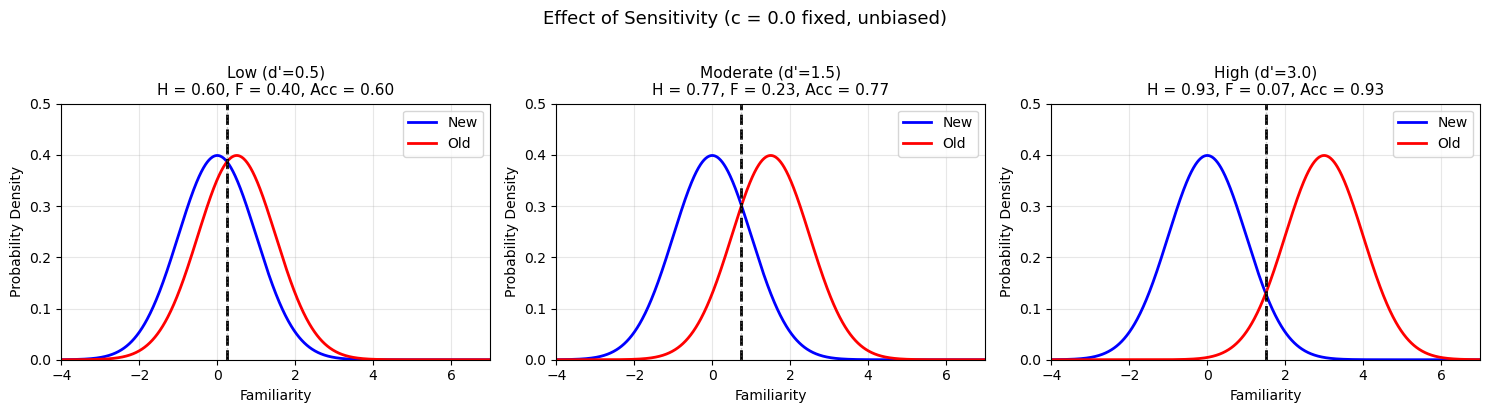

In [6]:
# Visualize different sensitivity levels with FIXED criterion

d_primes = [0.5, 1.5, 3.0]  # Low, moderate, high sensitivity
criterion_c = 0.0  # Keep criterion fixed (unbiased)

sensitivity_labels = ['Low (d\'=0.5)', 'Moderate (d\'=1.5)', 'High (d\'=3.0)']

x = np.linspace(-4, 7, 1000)
new_dist = stats.norm(loc=0, scale=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (dp, label) in enumerate(zip(d_primes, sensitivity_labels)):
    ax = axes[i]
    old_dist = stats.norm(loc=dp, scale=1)
    
    # Convert c to threshold location k (depends on d')
    k = criterion_c + dp / 2
    
    # Plot distributions
    ax.plot(x, new_dist.pdf(x), 'b-', linewidth=2, label='New')
    ax.plot(x, old_dist.pdf(x), 'r-', linewidth=2, label='Old')
    ax.axvline(x=k, color='black', linestyle='--', linewidth=2)
    
    # Mark midpoint
    ax.axvline(x=dp/2, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    
    # Calculate rates
    H = 1 - old_dist.cdf(k)
    F = 1 - new_dist.cdf(k)
    accuracy = 0.5 * (H + (1 - F))  # Assuming 50% old, 50% new
    
    ax.set_title(f'{label}\nH = {H:.2f}, F = {F:.2f}, Acc = {accuracy:.2f}', fontsize=11)
    ax.set_xlabel('Familiarity')
    ax.set_ylabel('Probability Density')
    ax.set_xlim(-4, 7)
    ax.set_ylim(0, 0.5)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.suptitle(f"Effect of Sensitivity (c = {criterion_c} fixed, unbiased)", fontsize=13, y=1.02)
plt.tight_layout()
plt.show()

<div class="alert alert-success">

**Exercise 2 Questions:**

1. As d' increases, what happens to overall accuracy? Why?

2. With d' = 0, what would the hit rate and false alarm rate be (for a criterion at 0)? What does this correspond to behaviorally?

3. Can a participant with low d' achieve high accuracy by adjusting their criterion? Explain.

### YOUR NOTES - Exercise 2

<div class="alert alert-success">

#### Exercise 3

In a single figure with multiple subplots, show how accuracy depends on both criterion and d'. You can do this with heatmaps, or with multiple curves. Do the same thing for other measures of performance such as hit rate or false alarms. (Hint: You can refer to the heatmaps shown in the lecture L4.)

How informative is accuracy on its own about the cognitive process of decision?

### YOUR Answers - Exercise 3

# 5. Simulating an SDT Experiment

Now let's simulate actual data from an SDT observer. We'll:
1. Generate trials (some old items, some new items)
2. For each trial, sample a familiarity value from the appropriate distribution
3. Apply the decision rule: if familiarity > criterion, respond "old"
4. Count up hits, misses, false alarms, and correct rejections

This simulates what would happen if a participant with known d' and criterion did a memory task.

In [9]:
def simulate_sdt_experiment(d_prime, criterion, n_old=100, n_new=100, seed=None):
    """
    Simulate an SDT experiment.
    
    Parameters:
    -----------
    d_prime : float
        Sensitivity (distance between distribution means)
    criterion : float
        Decision criterion c (bias relative to optimal unbiased point)
        c = 0 means unbiased (threshold at midpoint between distributions)
        c > 0 means conservative (say "old" less often)
        c < 0 means liberal (say "old" more often)
    n_old : int
        Number of old items in the test
    n_new : int
        Number of new items in the test
    seed : int, optional
        Random seed for reproducibility
        
    Returns:
    --------
    dict with hits, misses, false_alarms, correct_rejections, and familiarity values, responses, and threshold
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Convert criterion c to threshold location k on the x-axis
    # k = c + d'/2 (threshold is at midpoint + bias)
    k = criterion + d_prime / 2
    
    # Generate familiarity signals
    # New items: drawn from N(0, 1)
    familiarity_new = np.random.normal(loc=0, scale=1, size=n_new)
    # Old items: drawn from N(d', 1)
    familiarity_old = np.random.normal(loc=d_prime, scale=1, size=n_old)
    
    # Apply decision rule: say "old" if familiarity > k
    responses_new = familiarity_new > k  # True = said "old" (False Alarm if True)
    responses_old = familiarity_old > k  # True = said "old" (Hit if True)
    
    # Count outcomes
    hits = np.sum(responses_old)
    misses = n_old - hits
    false_alarms = np.sum(responses_new)
    correct_rejections = n_new - false_alarms
    
    return {
        'hits': hits,
        'misses': misses,
        'false_alarms': false_alarms,
        'correct_rejections': correct_rejections,
        'familiarity_old': familiarity_old,
        'familiarity_new': familiarity_new,
        'responses_old': responses_old,
        'responses_new': responses_new,
        'threshold_k': k  # Also return the actual threshold location
    }

In [10]:
# Run a simulation
TRUE_D_PRIME = 1.5
TRUE_CRITERION = 0.0  # c = 0 means unbiased (threshold at midpoint)
N_OLD = 100
N_NEW = 100

results = simulate_sdt_experiment(TRUE_D_PRIME, TRUE_CRITERION, N_OLD, N_NEW, seed=42)

# Print the confusion matrix
print("=" * 40)
print("SIMULATION RESULTS")
print("=" * 40)
print(f"True d' = {TRUE_D_PRIME}, True criterion c = {TRUE_CRITERION}")
print(f"(Threshold location k = c + d'/2 = {results['threshold_k']:.2f})")
print(f"N_old = {N_OLD}, N_new = {N_NEW}")
print()
print("Confusion Matrix:")
print("-" * 30)
print(f"                 Respond OLD   Respond NEW")
print(f"  Item is OLD:   {results['hits']:^11}   {results['misses']:^11}   (Hits / Misses)")
print(f"  Item is NEW:   {results['false_alarms']:^11}   {results['correct_rejections']:^11}   (FA / CR)")
print("-" * 30)
print()

# Calculate rates
hit_rate = results['hits'] / N_OLD
false_alarm_rate = results['false_alarms'] / N_NEW
print(f"Hit Rate (H):          {hit_rate:.3f}")
print(f"False Alarm Rate (F):  {false_alarm_rate:.3f}")

SIMULATION RESULTS
True d' = 1.5, True criterion c = 0.0
(Threshold location k = c + d'/2 = 0.75)
N_old = 100, N_new = 100

Confusion Matrix:
------------------------------
                 Respond OLD   Respond NEW
  Item is OLD:       72            28        (Hits / Misses)
  Item is NEW:       19            81        (FA / CR)
------------------------------

Hit Rate (H):          0.720
False Alarm Rate (F):  0.190


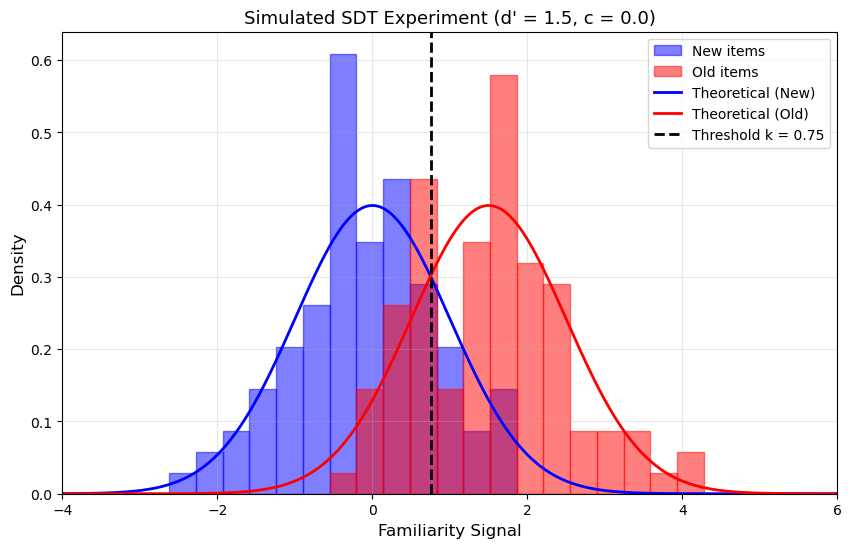

In [11]:
# Visualize the simulated data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms of familiarity values
bins = np.linspace(-4, 6, 30)
ax.hist(results['familiarity_new'], bins=bins, alpha=0.5, color='blue', 
        label='New items', density=True, edgecolor='blue')
ax.hist(results['familiarity_old'], bins=bins, alpha=0.5, color='red', 
        label='Old items', density=True, edgecolor='red')

# Overlay the theoretical distributions
x = np.linspace(-4, 6, 1000)
ax.plot(x, stats.norm(0, 1).pdf(x), 'b-', linewidth=2, label='Theoretical (New)')
ax.plot(x, stats.norm(TRUE_D_PRIME, 1).pdf(x), 'r-', linewidth=2, label='Theoretical (Old)')

# Plot criterion (use threshold_k for the x-axis location)
threshold_k = results['threshold_k']
ax.axvline(x=threshold_k, color='black', linestyle='--', linewidth=2, 
           label=f'Threshold k = {threshold_k:.2f}')

ax.set_xlabel('Familiarity Signal', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title(f'Simulated SDT Experiment (d\' = {TRUE_D_PRIME}, c = {TRUE_CRITERION})', fontsize=13)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)
ax.set_xlim(-4, 6)

plt.show()

# 6. Computing d' and Criterion from Data

In a real experiment, we don't know the participant's true d' or criterion — we only observe their responses. But SDT gives us equations to **recover** these parameters from the observed hit and false alarm rates!

The key insight: if we assume the distributions are Gaussian with equal variance, then:

$$d' = Z(H) - Z(F)$$

$$c = -\frac{1}{2}[Z(H) + Z(F)]$$

Where:
- $H$ = Hit Rate = Hits / (Hits + Misses)
- $F$ = False Alarm Rate = False Alarms / (False Alarms + Correct Rejections)
- $Z$ = inverse of the cumulative normal distribution (converts probability to z-score)

In Python, `Z = scipy.stats.norm.ppf`

In [12]:
def compute_sdt_parameters(hits, misses, false_alarms, correct_rejections):
    """
    Compute d' and criterion from observed counts.
    
    Parameters:
    -----------
    hits, misses, false_alarms, correct_rejections : int
        The four cells of the confusion matrix
        
    Returns:
    --------
    d_prime, criterion : float
        The estimated SDT parameters
    """
    # Calculate rates
    hit_rate = hits / (hits + misses)
    false_alarm_rate = false_alarms / (false_alarms + correct_rejections)
    
    # Handle edge cases (rates of 0 or 1 give infinite z-scores)
    # Common correction: replace 0 with 0.5/n and 1 with (n-0.5)/n
    n_old = hits + misses
    n_new = false_alarms + correct_rejections
    
    if hit_rate == 0:
        hit_rate = 0.5 / n_old
    elif hit_rate == 1:
        hit_rate = (n_old - 0.5) / n_old
        
    if false_alarm_rate == 0:
        false_alarm_rate = 0.5 / n_new
    elif false_alarm_rate == 1:
        false_alarm_rate = (n_new - 0.5) / n_new
    
    # Convert to z-scores
    z_hit = stats.norm.ppf(hit_rate)
    z_fa = stats.norm.ppf(false_alarm_rate)
    
    # Compute d' and criterion
    d_prime = z_hit - z_fa
    criterion = -0.5 * (z_hit + z_fa)
    
    return d_prime, criterion, hit_rate, false_alarm_rate

In [13]:
# Recover parameters from our simulated data
estimated_d_prime, estimated_criterion, H, F = compute_sdt_parameters(
    results['hits'], 
    results['misses'], 
    results['false_alarms'], 
    results['correct_rejections']
)

print("=" * 50)
print("PARAMETER RECOVERY")
print("=" * 50)
print(f"{'Parameter':<20} {'True Value':<15} {'Estimated':<15}")
print("-" * 50)
d_prime_label = "d' (sensitivity)"
print(f"{d_prime_label:<20} {TRUE_D_PRIME:<15.3f} {estimated_d_prime:<15.3f}")
print(f"{'c (criterion)':<20} {TRUE_CRITERION:<15.3f} {estimated_criterion:<15.3f}")
print("-" * 50)
print(f"\nHit Rate (H) = {H:.3f}")
print(f"False Alarm Rate (F) = {F:.3f}")
print(f"\nZ(H) = {stats.norm.ppf(H):.3f}")
print(f"Z(F) = {stats.norm.ppf(F):.3f}")

PARAMETER RECOVERY
Parameter            True Value      Estimated      
--------------------------------------------------
d' (sensitivity)     1.500           1.461          
c (criterion)        0.000           0.148          
--------------------------------------------------

Hit Rate (H) = 0.720
False Alarm Rate (F) = 0.190

Z(H) = 0.583
Z(F) = -0.878


<div class="alert alert-success">

# 7. Exercise 4: Simulation and Parameter Recovery

**Your task**: Use the simulation and parameter recovery functions to explore how well we can estimate SDT parameters from data.

1. Run the simulation multiple times with different random seeds (remove the seed argument or change it). How much do the estimates vary?

2. Try simulations with fewer trials (e.g., n_old=20, n_new=20). Does parameter recovery get worse? Why?

3. Try simulations with more trials (e.g., n_old=500, n_new=500). What happens to parameter recovery?

4. Simulate a participant with d' = 0 (no sensitivity). What do you observe about the estimated parameters?

In [14]:
# YOUR CODE - Experiment with simulations

### YOUR NOTES - Exercise 4

<div class="alert alert-success">

# 8. Exercise 5: Systematic Parameter Recovery

Write code to do the previous analysis systematically for different criteria and d', and visualize the results:
- Select true d' from 0 to 2 in small increments (e.g. 0.2)
- Select true criterion from -1 to 1 in small increments
- For each parameter value combination, simulate data with true d' and true criterion, and compute the estimated d' and criterion from the data
- Visualize the results (e.g. plot estimated d' against true d', estimated criterion against true criterion)
- Create multiple subplots for different data sizes (e.g. n_old=20, 100, 500)

Check your conclusions from Exercise 4.

In [ ]:
# YOUR CODE - parameter recovery